In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Models
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Ridge

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline


In [2]:
# read csv

df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df_raw.to_csv("medical_insurance_cost.csv")

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
1022,47,male,36.080,1,yes,southeast,42211.13820
414,19,female,35.150,0,no,northwest,2134.90150
60,43,male,27.360,3,no,northeast,8606.21740
534,64,male,40.480,0,no,southeast,13831.11520
92,59,male,29.830,3,yes,northeast,30184.93670
195,19,male,30.590,0,no,northwest,1639.56310
393,49,male,31.350,1,no,northeast,9290.13950
1296,18,male,26.125,0,no,northeast,1708.92575
901,60,male,40.920,0,yes,southeast,48673.55880
1149,42,male,34.100,0,no,southwest,5979.73100


In [6]:
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


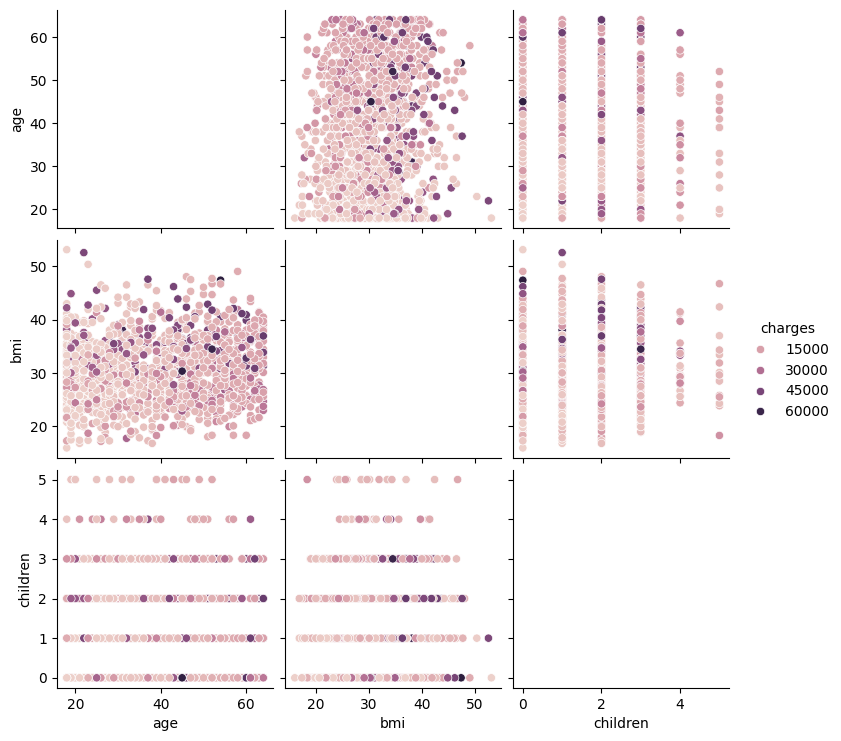

In [7]:
# Visualize data

#Pairplot

sns.pairplot(data=df_raw, hue='charges')
plt.show()

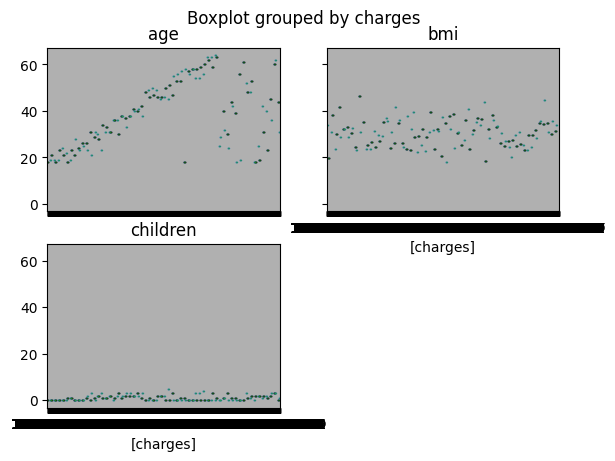

In [8]:
# Boxplots

df_raw.boxplot(by='charges')
plt.show()

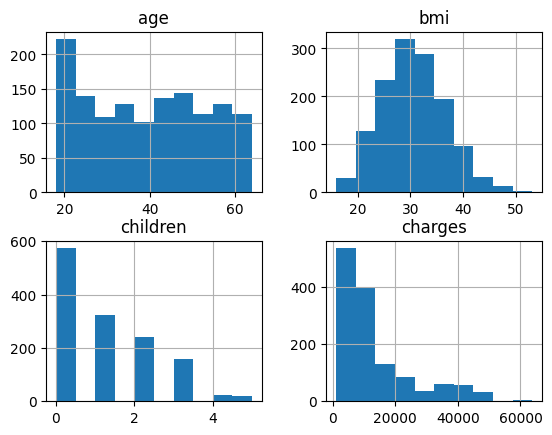

In [9]:
# Histograms

df_raw.hist()
plt.show()

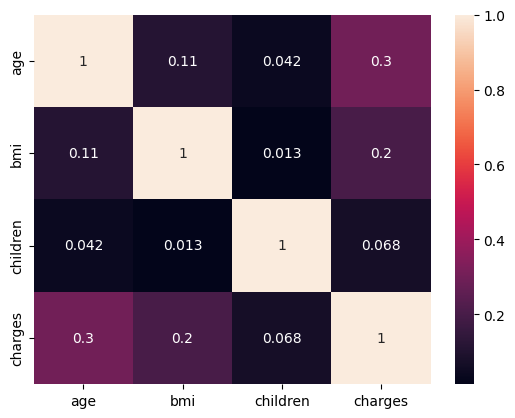

In [10]:
# Correlation

numerical = df_raw.select_dtypes(include=[np.number])

correlation = numerical.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [11]:
processed_df = df_raw.copy()
processed_df['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [16]:
# Linear Regression

# 1) split data

X = processed_df.drop(columns=['charges'])

y = processed_df['charges'] #target

# 1.1 hot-one encoding (errors arose from categorical values)

X_encoded = pd.get_dummies(X, drop_first=True)


# 2) split sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2001)


# Run model

ln_model = LinearRegression()

ln_model.fit(X_train, y_train)


# test the prediction

y_hat = ln_model.predict(X_test)


# evaluation and results

print(f"MSE: {mean_squared_error(y_test, y_hat)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_hat))}")
print(f"R_2_score: {r2_score(y_test, y_hat)}")


MSE: 43792046.624982275
RMSE: 6617.555940449788
R_2_score: 0.696000738049634


In [21]:
# NOT GREAT RESULTS. WILL OPTIMIZE

In [17]:
print(X_encoded.head())

   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     False        True             False   
1   18  33.770         1      True       False             False   
2   28  33.000         3      True       False             False   
3   33  22.705         0      True       False              True   
4   32  28.880         0      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [18]:
print(X_encoded.columns)

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [19]:
# Before encoding
print(X['sex'].unique())
print(X['smoker'].unique())
print(X['region'].unique())

# After encoding
print(X_encoded.filter(like='sex').columns)
print(X_encoded.filter(like='smoker').columns)
print(X_encoded.filter(like='region').columns)

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']
Index(['sex_male'], dtype='object')
Index(['smoker_yes'], dtype='object')
Index(['region_northwest', 'region_southeast', 'region_southwest'], dtype='object')


In [20]:
print(X_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_male          1338 non-null   bool   
 4   smoker_yes        1338 non-null   bool   
 5   region_northwest  1338 non-null   bool   
 6   region_southeast  1338 non-null   bool   
 7   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(1), int64(2)
memory usage: 38.0 KB
None


In [24]:
# Linear Regression (with Scaled data)

# 1) split data

X = processed_df.drop(columns=['charges'])

y = processed_df['charges'] #target

# 1.1 hot-one encoding (errors arose from categorical values)

X_encoded = pd.get_dummies(X, drop_first=True)


# 2) split sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2001)


# scaling 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Run model

ln_model = LinearRegression()

ln_model.fit(X_train_scaled, y_train)


# test the prediction

y_hat = ln_model.predict(X_test_scaled)


# evaluation and results

print(f"MSE: {mean_squared_error(y_test, y_hat)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_hat))}")
print(f"R_2_score: {r2_score(y_test, y_hat)}")

MSE: 43792046.62498226
RMSE: 6617.555940449786
R_2_score: 0.6960007380496341


In [29]:
# Linear Regression (with dropped variables)

# 1) split data

X = processed_df[['sex', 'age', 'bmi', 'smoker']]

y = processed_df['charges'] #target

# 1.1 hot-one encoding (errors arose from categorical values)

X_encoded = pd.get_dummies(X, drop_first=True)


# 2) split sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2001)


# scaling 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Run model

ln_model = LinearRegression()

ln_model.fit(X_train_scaled, y_train)


# test the prediction

y_hat = ln_model.predict(X_test_scaled)


# evaluation and results

print(f"MSE: {mean_squared_error(y_test, y_hat)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_hat))}")
print(f"R_2_score: {r2_score(y_test, y_hat)}")

MSE: 44442022.73642923
RMSE: 6666.485036091301
R_2_score: 0.691488679961613
